# Esercitazione 7
## Convoluzione e sistemi LTI
#### Sommario
L’esercitazione è dedicata allo studio del prodotto di convoluzione, con particolare attenzione alla convoluzione circolare e alle proprietà dei sistemi lineari tempo-invarianti (LTI). Nella prima parte, si affronta la convoluzione circolare sia con calcoli manuali che tramite implementazioni numeriche, utilizzando la moltiplicazione matriciale e la Trasformata Discreta di Fourier (DFT). Successivamente, si analizzano le prestazioni computazionali delle due implementazioni applicandole a vettori di grandi dimensioni. La seconda parte è focalizzata sull’analisi delle proprietà fondamentali dei sistemi LTI.


In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import circulant
from scipy import fftpack as f
import numpy.fft as fft
import time

#### Esercizio 1
(a) Calcolare a mano la convoluzione circolare tra i seguenti vettori:

- $a = [1, 2, 3, 0, 0, 0]$
- $b = [2, 3, 4, 0, 0, 0]$

(b) Scrivere una funzione che calcoli la convoluzione circolare attraverso la moltiplicazione matriciale ed una invece che la calcoli attraverso la DFT. Verificare la correttezza delle funzioni confrontando con il risultato ottenuto al punto precedente.


Convoluzione circolare (calcolo manuale): [ 2.  7. 16. 17. 12.  0.]
Convoluzione circolare (matrice): [ 2.  7. 16. 17. 12.  0.]
Convoluzione circolare (FFT): [ 2.  7. 16. 17. 12.  0.]
✅ Le tre implementazioni producono lo stesso risultato!


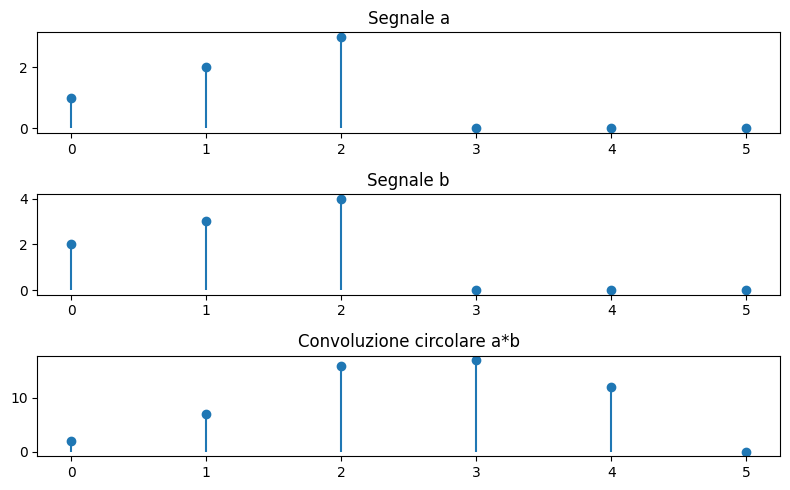

In [5]:
# ===========================
# Funzione: Convoluzione circolare tramite moltiplicazione matriciale
# ===========================
def cconv_matrix(x, y):
    """
    Calcola la convoluzione circolare tra due vettori usando la moltiplicazione
    per la matrice circolante.
    """
    M = circulant(x)           # Matrice circolante costruita da x
    return np.dot(M, y)        # Prodotto matrice-vettore

# ===========================
# Funzione: Convoluzione circolare tramite FFT
# ===========================
def cconv_fft(x, y):
    """
    Calcola la convoluzione circolare tra due vettori usando la FFT.
    """
    X = fft.fft(x)
    Y = fft.fft(y)
    return np.real(fft.ifft(X * Y))  # ifft del prodotto nello spazio delle frequenze

# ===========================
# Dati dell'esercizio
# ===========================
a = np.array([1.0, 2.0, 3.0, 0.0, 0.0, 0.0])
b = np.array([2.0, 3.0, 4.0, 0.0, 0.0, 0.0])

# ===========================
# (a) Calcolo manuale (formula diretta)
# ===========================
N = len(a)
res_manual = np.zeros(N)
for n in range(N):
    for m in range(N):
        res_manual[n] += a[m] * b[(n - m) % N]

print(f"Convoluzione circolare (calcolo manuale): {res_manual}")

# ===========================
# (b) Convoluzione con moltiplicazione matriciale
# ===========================
res_matrix = cconv_matrix(a, b)
print(f"Convoluzione circolare (matrice): {res_matrix}")

# ===========================
# (b) Convoluzione con FFT
# ===========================
res_fft = cconv_fft(a, b)
print(f"Convoluzione circolare (FFT): {res_fft}")

# ===========================
# Verifica correttezza
# ===========================
if np.allclose(res_manual, res_matrix) and np.allclose(res_manual, res_fft):
    print("✅ Le tre implementazioni producono lo stesso risultato!")
else:
    print("⚠️ Attenzione: risultati diversi!")

# ===========================
# Grafici
# ===========================
plt.figure(figsize=(8, 5))

plt.subplot(3, 1, 1)
plt.stem(np.arange(N), a, basefmt=" ")
plt.title("Segnale a")

plt.subplot(3, 1, 2)
plt.stem(np.arange(N), b, basefmt=" ")
plt.title("Segnale b")

plt.subplot(3, 1, 3)
plt.stem(np.arange(N), res_manual, basefmt=" ")
plt.title("Convoluzione circolare a*b")

plt.tight_layout()
plt.show()


#### Esercizio 2
Considerare i seguenti vettori:

- $a = [0, 1, 2, \dots, 1022, 1023]$
- $b = [1, 2, 3, \dots, 1023, 1024]$

Calcolare la convoluzione circolare utilizzando le due funzioni definite al punto precedente. Confrontare i tempi di esecuzione delle due funzioni tramite il comando $	exttt{process\_time}$ della libreria $	exttt{time}$.


In [7]:
# ===========================
# Vettori dell'esercizio
# ===========================
a = np.arange(1024)       # [0, 1, 2, ..., 1023]
b = np.arange(1024) + 1   # [1, 2, 3, ..., 1024]

# ===========================
# Misura tempo convoluzione matriciale
# ===========================
start_time = time.process_time()
res_matrix = cconv_matrix(a, b)  # Funzione definita nell'Esercizio 1
end_time = time.process_time()
time_matrix = end_time - start_time
print(f"Tempo convoluzione (matrice): {time_matrix:.6f} secondi")

# ===========================
# Misura tempo convoluzione FFT
# ===========================
start_time = time.process_time()
res_fft = cconv_fft(a, b)  # Funzione definita nell'Esercizio 1
end_time = time.process_time()
time_fft = end_time - start_time
print(f"Tempo convoluzione (FFT): {time_fft:.6f} secondi")

# ===========================
# Verifica correttezza
# ===========================
if np.allclose(res_matrix, res_fft):
    print("✅ I risultati delle due implementazioni coincidono.")
else:
    print("⚠️ I risultati delle due implementazioni differiscono!")

# ===========================
# Confronto velocità relativa
# ===========================
speed_improvement = (time_matrix - time_fft) / time_matrix * 100
print(f"⏱️ La FFT è più veloce del {speed_improvement:.2f}% rispetto al metodo matriciale.")


Tempo convoluzione (matrice): 0.062500 secondi
Tempo convoluzione (FFT): 0.000000 secondi
✅ I risultati delle due implementazioni coincidono.
⏱️ La FFT è più veloce del 100.00% rispetto al metodo matriciale.


#### Esercizio 3

**Convoluzione: proprietà principali**

(a) Considerare un sistema LTI con la seguente risposta all’impulso:

$$
h(t) = \frac{40\pi}{1000} \, \mathrm{sinc} \left( \frac{40\pi t}{1000} \right)
$$

dove \$t\_1\$ è un vettore equispaziato di 101 punti compresi tra \$-50\$ e \$50\$.
Calcolare la DFT di \$h(t)\$ e fare un plot del valore assoluto dei coefficienti (per fare il plot utilizzare la funzione `np.fft.fftshift` per centrare in mezzo la frequenza nulla).

(b) Calcolare l’output del sistema LTI utilizzando come input i seguenti vettori:

* \$x\_1(t) = \sin\left( \frac{40\pi t}{1000} \right)\$
* \$x\_2(t) = \sin\left( \frac{320\pi t}{1000} \right)\$

dove \$t\$ è un vettore equispaziato di 1000 punti compresi tra \$0\$ e \$999\$.
Per calcolare la convoluzione lineare tra due vettori \$x\$ e \$y\$ utilizzare il comando `np.convolve(x, y, 'valid')`.

(c) Per entrambi i segnali di input, calcolare la DFT dell’input e dell’output del sistema LTI e fare un plot del valore assoluto dei coefficienti (per fare il plot utilizzare la funzione `np.fft.fftshift`).

(d) Calcolare l’output del sistema LTI utilizzando come input:

$$
x(t) = 2x_1(t) - 10x_2(t)
$$

Verificare la linearità del sistema confrontando il risultato ottenuto e la combinazione lineare:

$$
y(t) = 2y_1(t) - 10y_2(t)
$$

dove \$y\_1(t)\$ e \$y\_2(t)\$ sono l’output del sistema LTI utilizzando come input rispettivamente \$x\_1(t)\$ e \$x\_2(t)\$.

(e) Considerare il segnale \$x\_{1d}\$ definito come il segnale \$x\_1\$ traslato nel tempo di 100 campioni.
Calcolare l’output del sistema LTI utilizzando come input \$x\_{1d}\$.
Verificare la tempo-invarianza del sistema confrontando il risultato ottenuto e il segnale \$y\_{1d}\$ definito come il segnale \$y\_1\$ traslato nel tempo di 100 campioni.

---


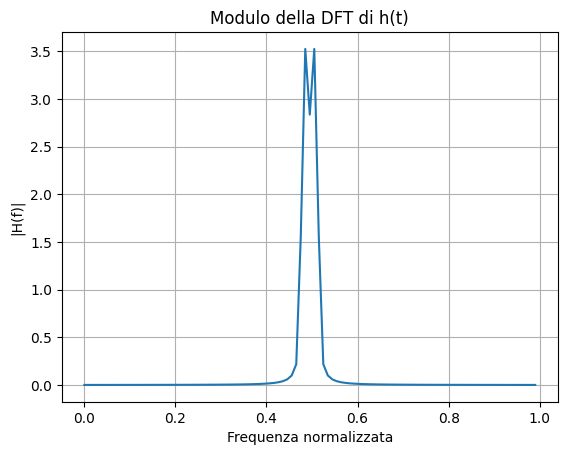

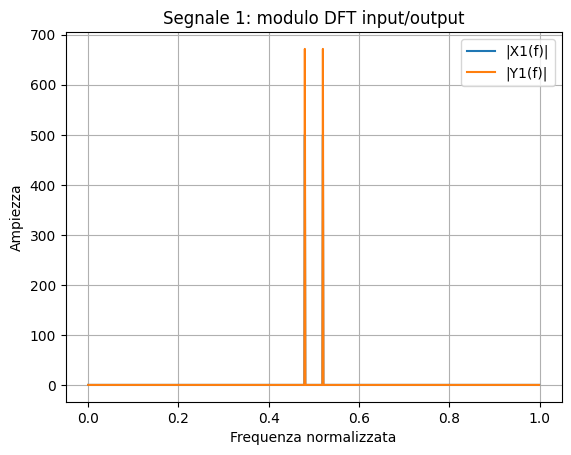

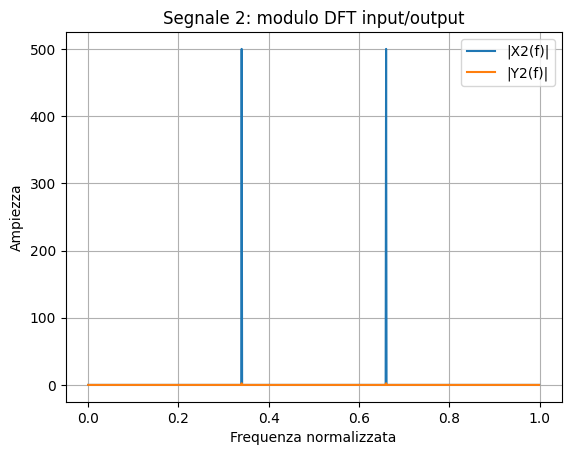

Massima differenza per la linearità: 2.22e-15
Massima differenza per la tempo-invarianza: 0.00e+00


In [9]:
# ===========================
# (a) Risposta all'impulso h(t)
# ===========================
t1 = np.linspace(-50, 50, 101)  # 101 punti equispaziati
h = (40 * np.pi / 1000) * np.sinc((40 * np.pi / 1000) * t1 / np.pi)  # sinc normalizzata

# Plot modulo della DFT di h(t)
H_abs = np.abs(fft.fftshift(fft.fft(h)))
plt.figure()
plt.plot(np.arange(len(t1)) / len(t1), H_abs)
plt.xlabel("Frequenza normalizzata")
plt.ylabel("|H(f)|")
plt.title("Modulo della DFT di h(t)")
plt.grid(True)
plt.show()

# ===========================
# (b) Input x1(t) e x2(t) e uscite y1(t), y2(t)
# ===========================
t = np.arange(1000, dtype=float)

x1 = np.sin(40 * np.pi * t / 1000)
y1 = np.convolve(x1, h, mode="valid")

x2 = np.sin(320 * np.pi * t / 1000)
y2 = np.convolve(x2, h, mode="valid")

# Plot DFT input/output segnale 1
plt.figure()
plt.plot(np.arange(len(x1)) / len(x1), np.abs(fft.fftshift(fft.fft(x1))), label="|X1(f)|")
plt.plot(np.arange(len(y1)) / len(y1), np.abs(fft.fftshift(fft.fft(y1))), label="|Y1(f)|")
plt.title("Segnale 1: modulo DFT input/output")
plt.xlabel("Frequenza normalizzata")
plt.ylabel("Ampiezza")
plt.legend()
plt.grid(True)
plt.show()

# Plot DFT input/output segnale 2
plt.figure()
plt.plot(np.arange(len(x2)) / len(x2), np.abs(fft.fftshift(fft.fft(x2))), label="|X2(f)|")
plt.plot(np.arange(len(y2)) / len(y2), np.abs(fft.fftshift(fft.fft(y2))), label="|Y2(f)|")
plt.title("Segnale 2: modulo DFT input/output")
plt.xlabel("Frequenza normalizzata")
plt.ylabel("Ampiezza")
plt.legend()
plt.grid(True)
plt.show()

# ===========================
# (d) Verifica linearità
# ===========================
x = 2 * x1 - 10 * x2
y = np.convolve(x, h, mode="valid")

y_check = 2 * y1 - 10 * y2
diff_lin = np.max(np.abs(y - y_check))
print(f"Massima differenza per la linearità: {diff_lin:.2e}")

# ===========================
# (e) Verifica tempo-invarianza
# ===========================
x1d = x1[100:]  # traslato di 100 campioni
y1d = np.convolve(x1d, h, mode="valid")

y1d_check = y1[100:]  # uscita traslata
diff_time = np.max(np.abs(y1d - y1d_check))
print(f"Massima differenza per la tempo-invarianza: {diff_time:.2e}")
